In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline
%pylab inline
from sklearn.model_selection import RepeatedKFold

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Transform sex variable
def transformar_sexo(valor):
    if valor == 'female':
        return 1
    else:
        return 0

In [4]:
# Loading train and test datasets
train = pd.read_csv("titanic//train.csv")
test = pd.read_csv("titanic//test.csv")

In [5]:
#Shape of train dataset
train.shape

(891, 12)

In [6]:
#Shape of test dataset
test.shape

(418, 11)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028FE663E240>,
      dtype=object)

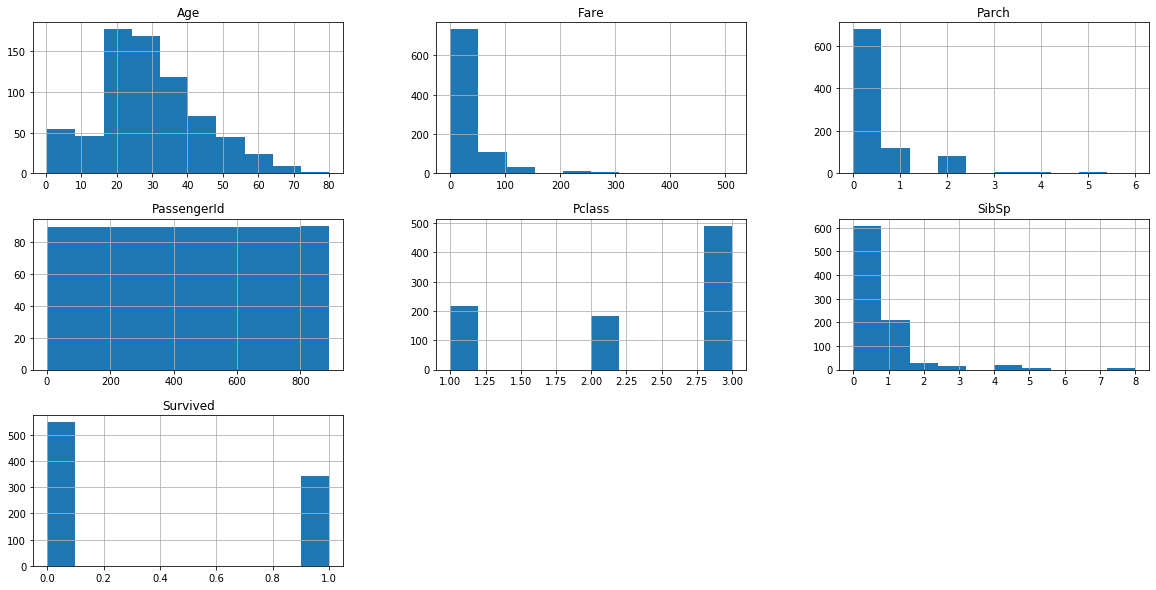

In [7]:
#Histogram about numeric variables in dataset
train.hist(figsize = (20,10))

In [8]:
# Create new variables for dataset
train['Embarked_S'] = (train['Embarked'] == 'S').astype(int)
train['Embarked_C'] = (train['Embarked'] == 'C').astype(int)
train['Cabine_nula'] = train['Cabin'].isnull().astype(int)
train['Nome_contem_Miss'] = train['Name'].str.contains("Miss").astype(int)
train['Nome_contem_Mrs'] = train['Name'].str.contains("Mrs").astype(int)
train['Nome_contem_Master'] = train['Name'].str.contains("Master").astype(int)
train['Nome_contem_Col'] = train['Name'].str.contains("Col").astype(int)
train['Nome_contem_Major'] = train['Name'].str.contains("Major").astype(int)
train['Nome_contem_Mr'] = train['Name'].str.contains("Mr").astype(int)
train['Sex_binario'] = train['Sex'].map(transformar_sexo)
test['Sex_binario'] = test['Sex'].map(transformar_sexo)

# Variables that will entrer on the model

variaveis = ['Sex_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked_S', 'Embarked_C', 'Cabine_nula',
             'Nome_contem_Miss', 'Nome_contem_Mrs',
             'Nome_contem_Master', 'Nome_contem_Col', 'Nome_contem_Major', 'Nome_contem_Mr']

# Independet variables
X = train[variaveis].fillna(-1)
# Dependent variables
y = train['Survived']

In [9]:
# Creating train and test in train dataset
np.random.seed(1)
X_treino, X_valid, y_treino, y_valid = train_test_split(X, y, test_size=0.4)

In [12]:
# Using repeat Kfold to better results
resultados = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=20)

for linhas_treino, linhas_valid in kf.split(X):

    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]
    
    
    # Using Logistic Regression
    modelo = LogisticRegression(max_iter = 10000)
    
    modelo.fit(X_treino, y_treino)

    p = modelo.predict(X_valid)

    acc = np.mean(y_valid == p)
    resultados.append(acc)

(array([1., 0., 4., 1., 3., 2., 1., 3., 3., 2.]),
 array([0.80269058, 0.80579231, 0.80889404, 0.81199577, 0.8150975 ,
        0.81819922, 0.82130095, 0.82440268, 0.82750441, 0.83060614,
        0.83370787]),
 <a list of 10 Patch objects>)

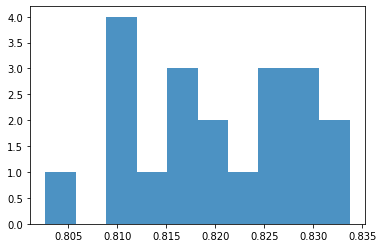

In [13]:
pylab.hist(resultados,alpha=0.8)